<a href="https://colab.research.google.com/github/Elise643/AdvCS/blob/main/Unit_6_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [197]:
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import matplotlib.pyplot as plt

In [198]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/marvel-comic-books")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/deepcontractor/marvel-comic-books/versions/4


In [199]:
comics = pd.read_csv("/root/.cache/kagglehub/datasets/deepcontractor/marvel-comic-books/versions/4/Marvel_Comics.csv")

In [200]:
comics['Price']=comics['Price'].str.replace("Free","$0.00")
comics['Price']=comics['Price'].str.replace("$","")
comics


,comic_name,active_years,issue_title,publish_date,issue_description,penciler,writer,cover_artist,Imprint,Format,Rating,Price
0,A Year of Marvels: April Infinite Comic (2016),(2016),A Year of Marvels: April Infinite Comic (2016) #1,"April 01, 2016",The Infinite Comic that will have everyone tal...,Yves Bigerel,Yves Bigerel,Jamal Campbell,Marvel Universe,Infinite Comic,Rated T+,0.00
1,A Year of Marvels: August Infinite Comic (2016),(2016),A Year of Marvels: August Infinite Comic (2016...,"August 10, 2016","It’s August, and Nick Fury is just in time to ...",Jamal Campbell,"Chris Sims, Chad Bowers",NaN,Marvel Universe,Infinite Comic,NaN,0.00
2,A Year of Marvels: February Infinite Comic (2016),(2016),A Year of Marvels: February Infinite Comic (20...,"February 10, 2016",Join us in a brand new Marvel comics adventure...,"Danilo S. Beyruth, M Mast",Ryan North,NaN,Marvel Universe,Infinite Comic,Rated T+,0.00
3,A Year of Marvels: July Infinite Comic (2016),(2016),A Year of Marvels: July Infinite Comic (2016) #1,"June 29, 2016",Celebrating the Fourth of July is complicated ...,Juanan Ramirez,Chuck Wendig,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,0.00
4,A Year of Marvels: June Infinite Comic (2016),(2016),A Year of Marvels: June Infinite Comic (2016) #1,"June 15, 2016",Sam Alexander’s finding it hard to cope with t...,Diego Olortegui,Paul Allor,Jamal Campbell,Marvel Universe,Infinite Comic,NaN,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
34987,Ziggy Pig - Silly Seal Comics (2019),(2019),Ziggy Pig - Silly Seal Comics (2019) #1,"March 06, 2019",NOT SO FUNNY WHEN IT HAPPENS TO YOU? Once they...,Jacob Chabot,"John Cerilli, Frank Tieri",Nic Klein,Marvel Universe,Comic,Parental Advisory,3.99
34988,Zombie (2006),(2006),Zombie (2006) #4,"December 20, 2006",With a thousand zombies in front of him and tw...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,3.99
34989,Zombie (2006),(2006),Zombie (2006) #3,"November 29, 2006",The hordes of zombies gathered outside the hig...,Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,3.99
34990,Zombie (2006),(2006),Zombie (2006) #2,"October 25, 2006","For Simon Garth, it's come down to two very ba...",Kyle Hotz,Mike Raicht,Kyle Hotz,MAX,Comic,EXPLICIT CONTENT,3.99


In [201]:
comics.drop(columns=['issue_title','comic_name','issue_description',	'penciler',	'writer',	'cover_artist',	'Imprint','active_years'],axis=1,inplace=True)
comics

,publish_date,Format,Rating,Price
0,"April 01, 2016",Infinite Comic,Rated T+,0.00
1,"August 10, 2016",Infinite Comic,NaN,0.00
2,"February 10, 2016",Infinite Comic,Rated T+,0.00
3,"June 29, 2016",Infinite Comic,NaN,0.00
4,"June 15, 2016",Infinite Comic,NaN,0.00
...,...,...,...,...
34987,"March 06, 2019",Comic,Parental Advisory,3.99
34988,"December 20, 2006",Comic,EXPLICIT CONTENT,3.99
34989,"November 29, 2006",Comic,EXPLICIT CONTENT,3.99
34990,"October 25, 2006",Comic,EXPLICIT CONTENT,3.99


In [202]:
comics['Rating'].unique()

array([' Rated T+', nan, ' Rated T', ' ALL AGES', ' A',
       ' Parental Advisory', ' Marvel Psr', ' No Rating', ' MARVEL PSR',
       ' T', ' RATED T', ' Max', ' RATED T+', ' RATED A', ' All Ages',
       ' T+', ' Rated a', ' Rated A',
       ' Parental Advisory/Explicit Content', ' PARENTAL SUPERVISION',
       ' PARENTAL ADVISORY', ' Mature', ' MARVEL PSR+',
       ' EXPLICIT CONTENT', ' PARENTAL ADVISORYSLC',
       ' Parental AdvisorySLC', ' Parental Advisoryslc',
       ' Explicit Content', ' PARENTAL ADVISORY/EXPLICIT CONTENT',
       ' NO RATING', ' NOT IN ORACLE', ' Parental Guidance',
       ' Ages 10 & Up', ' Not in Oracle', ' MAX', ' Marvel Psr+',
       ' Ages 9+'], dtype=object)

In [203]:
labs = {' PARENTAL ADVISORY/EXPLICIT CONTENT':'17',' Parental Advisory/Explicit Content':'17',
        ' PARENTAL ADVISORYSLC':'17', ' Parental AdvisorySLC':'17',  ' Parental Advisoryslc':'17',
        ' PARENTAL ADVISORY':'17',' Parental Advisory':'17',
        ' Explicit Content':'18', ' EXPLICIT CONTENT':'18',
        ' PARENTAL SUPERVISION':'12',
        ' Parental Guidance':'10',
        ' RATED T+':'15',' Rated T+':'15',
        ' Marvel Psr+':'14',' MARVEL PSR+':'14',
        ' Marvel Psr':'12', ' MARVEL PSR':'12',
        ' Rated T':'12', ' RATED T':'12',
        ' ALL AGES':'0',' All Ages':'0',
        ' MAX':'18',' Max':'18',
        ' RATED A':'9',' Rated a':'9',' Rated A':'9',
        ' Ages 10 & Up':'10',
        ' Ages 9+':'9',
        ' Mature':'17',
        ' T+':'15',
        ' T':'12',
        ' A':'9',


}
for key,pla in labs.items():
  comics['Rating']=comics['Rating'].str.replace(key,pla)



In [204]:
comics=comics[(pd.isna(comics['Rating'])==False)]
comics=comics[comics['Rating']!=" NOT IN ORACLE"]
comics =comics[comics['Rating']!=" Not in Oracle"]
comics=comics[comics['Rating']!=" No Rating"]
comics=comics[comics['Rating']!=" NO RATING"]
comics['publish_date']=comics['publish_date'].str[-4:]
comics["publish_date"] = pd.to_numeric(comics["publish_date"])
comics=comics[comics["publish_date"]>100]

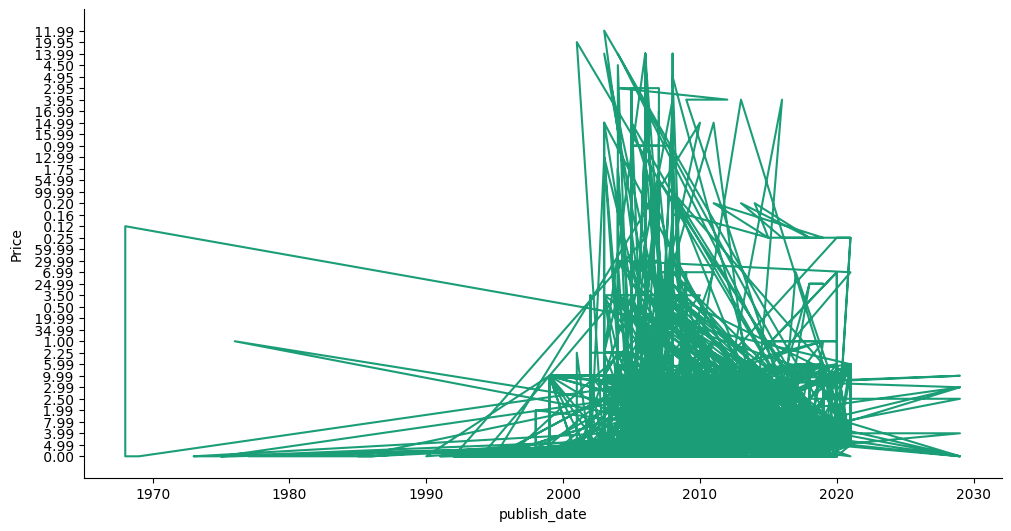

In [205]:
# @title publish_date vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))

  xs = comics['publish_date']
  ys = comics['Price']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comics.sort_values('publish_date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('publish_date')
_ = plt.ylabel('Price')

Wow. That did not turn out the way I'd hoped at all. I don't know if it's because I used a template graph or because it just didn't work, so I'll do a scatter plot this time.

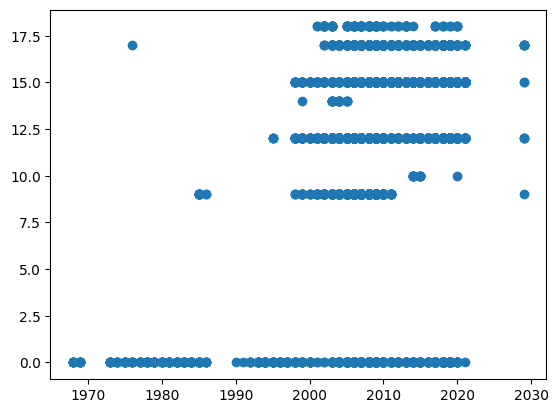

In [206]:

comics["Rating"] = pd.to_numeric(comics["Rating"])

comics.sort_values(by="publish_date")[0:10]
plt.scatter(comics["publish_date"], comics["Rating"])

Okay. There's something to work with. It appears that comics got higher age ratings more recently (in reality, I think it is just more common for things to be rated now, but this is good enough as it is.) It looks vaguely exponential so I'll start with that.